In [1]:
import numpy
import numpy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

y_0 = [0., 0., 0.]
y_1 = [-0.73927936, 0., 1.38309441]
y_2 = [-0.26847598, 1.67077279, 0.1754529]
x_center = [-0.33591845, 0.55692426, 0.51951577]

In [2]:
X = y_1/numpy.linalg.norm(y_1)
Z = numpy.cross(y_1, y_2)
Z = Z/numpy.linalg.norm(Z)
Y = numpy.cross(Z, X)

rotation_matrix = [X,Y,Z]

In [3]:
y_0_rot = numpy.matmul(rotation_matrix, y_0)
y_1_rot = numpy.matmul(rotation_matrix, y_1)
y_2_rot = numpy.matmul(rotation_matrix, y_2)
x_c_rot = numpy.matmul(rotation_matrix, x_center)

In [4]:
y0_final = numpy.zeros(3)
y1_final = numpy.zeros(3)
y2_final = numpy.zeros(3)

y0_final = y_0_rot - x_c_rot
y1_final = y_1_rot - x_c_rot
y2_final = y_2_rot - x_c_rot


In [26]:
v21 = y2_final - y1_final
v21u = v21/numpy.linalg.norm(v21)
orthog = numpy.cross([0., 0., 1.], v21u)
rot_mat_2 = [orthog, v21u, [0., 0., 0.]]

print y2_final
print numpy.matmul(rot_mat_2, y0_final),numpy.matmul(rot_mat_2, y1_final),numpy.matmul(rot_mat_2, y2_final)

# alpha = numpy.dot(v21, y1_final)/numpy.linalg.norm(v21)**2
# rOrthog = -1*alpha*v21 + y1_final

[-3.35228522e-01  1.11857415e+00 -3.23339566e-09]
[ 0.82958033 -0.0685489   0.        ] [-0.41479016 -1.02302583  0.        ] [-0.41479016  1.09157474  0.        ]


In [6]:
rot_mat = [orthog, v21u, [0., 0., 0.]]
y1_new = numpy.matmul(rot_mat, y1_final)
if y1_new[0] < 0.:
    v21u = -1*v21u
    orthog = -1*orthog
    rot_mat = numpy.reshape(rot_mat,(9,1))
    rot_mat = -1*rot_mat
    rot_mat = numpy.reshape(rot_mat,(3,3))
    y1_new_2 = numpy.matmul(rot_mat, y1_final)
x = y1_new_2[0]
y2_new = numpy.matmul(rot_mat, y2_final)

In [7]:
theta_1 = numpy.arctan2(y1_new_2[1],x)
theta_2 = numpy.arctan2(y2_new[1], x)

In [8]:
y1_new_2, y2_new

(array([0.41479016, 1.02302583, 0.        ]),
 array([ 0.41479016, -1.09157474,  0.        ]))

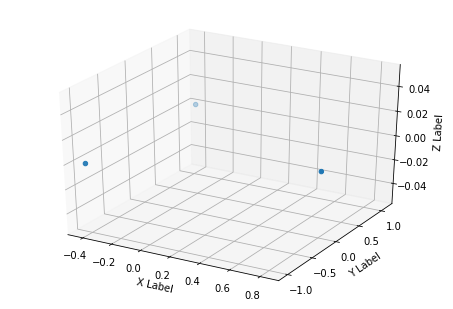

In [25]:
fig = plt.figure()
ax = Axes3D(fig)

# ax.scatter([y0_final[0], y1_final[0], y2_final[0], x_c_rot[0]], [y0_final[1], y1_final[1], y2_final[1], x_c_rot[1]], [y0_final[2], y1_final[2], y2_final[2], x_c_rot[2]])
ax.scatter([numpy.matmul(rot_mat_2, y0_final)[0], numpy.matmul(rot_mat_2, y1_final)[0], numpy.matmul(rot_mat_2, y2_final)[0]], [numpy.matmul(rot_mat_2, y0_final)[1], numpy.matmul(rot_mat_2, y1_final)[1], numpy.matmul(rot_mat_2, y2_final)[1]], [numpy.matmul(rot_mat_2, y0_final)[2], numpy.matmul(rot_mat_2, y1_final)[2], numpy.matmul(rot_mat_2, y2_final)[2]])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

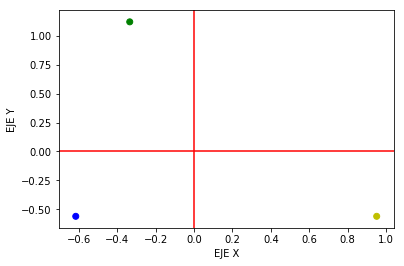

In [35]:
plt.scatter([y0_final[0], y1_final[0], y2_final[0]], [y0_final[1], y1_final[1], y2_final[1]], color = ['b', 'y', 'g'])
plt.xlabel('EJE X')
plt.ylabel('EJE Y')
plt.axvline(0., color = 'r')
plt.axhline(0., color = 'r')

In [36]:
y1_final, y2_final

(array([ 9.51751383e-01, -5.59287071e-01, -3.23339558e-09]),
 array([-3.35228522e-01,  1.11857415e+00, -3.23339566e-09]))

In [42]:
asdasd_1 = numpy.arctan2(y2_final[0], y2_final[1])

In [43]:
asdasd_1*180/numpy.pi

-16.683090340268667